The goal here is to get songs that were popular in different time intervals and:

1. check what feature was most correlated with popularity at that interval

2. given the popularity of a song, if the features that correlate with it correlate with the year, if a popular song is given, can we predict the year it was released given the features that make it popular

3. see if over time there was an increase for example, if there was an increase in danceability over time in the popular songs or if it remained the same throughout the years.

Here a popular song is defined as having a score greater than 50

In [2]:
# ! pip install pandas
import pandas as pd

df = pd.read_csv('spotify_data.csv')

X = df['year']
popularity_corr = {}
for i in range(1928, 2020, 5):
    new_interval = df[(X.between(i, i + 5)) & (df['popularity'] > 50)]
    
    popularity_corr[f"{i} - {i+5}"] = new_interval.corr()['popularity']


print(popularity_corr)


C:\Users\user\AppData\Local\Temp\ipykernel_10724\1033018116.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  popularity_corr[f"{i} - {i+5}"] = new_interval.corr()['popularity']


{'1928 - 1933': acousticness       -1.0
danceability        1.0
duration_ms        -1.0
energy             -1.0
explicit            NaN
instrumentalness    1.0
key                -1.0
liveness            1.0
loudness           -1.0
mode                NaN
popularity          1.0
speechiness         1.0
tempo              -1.0
valence             1.0
year                NaN
Name: popularity, dtype: float64, '1933 - 1938': acousticness        0.269212
danceability       -0.320882
duration_ms         0.202466
energy             -0.468155
explicit                 NaN
instrumentalness   -0.403839
key                -0.927708
liveness            0.581691
loudness           -0.996341
mode               -0.409644
popularity          1.000000
speechiness        -0.153886
tempo              -0.292582
valence             0.071775
year               -0.409644
Name: popularity, dtype: float64, '1938 - 1943': acousticness        8.313420e-01
danceability       -7.141084e-01
duration_ms        -5.011

From the first few results above, we see that when the interval is 5 years, we are not getting alot of information in the correlation matrix. Therefore, we will now increase the innterval to 10

In [3]:
# ! pip install pandas
import pandas as pd

df = pd.read_csv('spotify_data.csv')

X = df['year']

popularity_corr = {}

for i in range(1928, 2020, 10):
    new_interval = df[(X.between(i, i + 10)) & (df['popularity'] > 50)]
    
    popularity_corr[f"{i} - {i+10}"] = new_interval.corr()['popularity']


print(popularity_corr)

{'1928 - 1938': acousticness        0.269212
danceability       -0.320882
duration_ms         0.202466
energy             -0.468155
explicit                 NaN
instrumentalness   -0.403839
key                -0.927708
liveness            0.581691
loudness           -0.996341
mode               -0.409644
popularity          1.000000
speechiness        -0.153886
tempo              -0.292582
valence             0.071775
year               -0.409644
Name: popularity, dtype: float64, '1938 - 1948': acousticness       -0.081570
danceability       -0.260637
duration_ms        -0.544042
energy             -0.206500
explicit                 NaN
instrumentalness   -0.421290
key                 0.209416
liveness            0.494983
loudness            0.053249
mode                0.036555
popularity          1.000000
speechiness        -0.472676
tempo               0.165327
valence             0.108494
year                0.157662
Name: popularity, dtype: float64, '1948 - 1958': acousticness    

C:\Users\user\AppData\Local\Temp\ipykernel_10724\2786742902.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  popularity_corr[f"{i} - {i+10}"] = new_interval.corr()['popularity']


Now we are getting alot more information about the feature strongly correlated with popularity in this interval, but let us check if the size of the results gotten will be enough to do a regression if we find a strongly correlated feature. We can do this by getting the length of the dataframes before we get the correlation matrix.
Note: as a rule of thumb, we say that the points are enough for a regression if they are at least 30

we can do a correlation and save it in a variable. We want to now see, if a song is popular, based on the features that make it popular, can we guess thhe year.

In [26]:
import pandas as pd

df = pd.read_csv('spotify_data.csv')

X = df['year']

popularity_corr = {}

for i in range(1928, 2020, 10):
    # recall that we defined popularity by having a score greater than 50, so those are the songs that we are interested in
    new_interval = df[(X.between(i, i + 10)) & (df['popularity'] > 50)]
     
    print(f"{i} - {i+10}: {len(new_interval)}")
    # popularity_corr[f"{i} - {i+10}"] = new_interval.corr()

1928 - 1938: 3
1938 - 1948: 12
1948 - 1958: 120
1958 - 1968: 886
1968 - 1978: 2093
1978 - 1988: 2612
1988 - 1998: 4338
1998 - 2008: 8004
2008 - 2018: 16286
2018 - 2028: 5557


We see that it is at the interval from 1948-1958 that we start to have enogh points for a regression, so let us look at the features that correlate with popularity from that interval.

In [35]:
new_interval = df[(X.between(1948, 1958)) & (df['popularity'] > 50)]
new_interval.corr()['popularity']

C:\Users\user\AppData\Local\Temp\ipykernel_10724\1593928896.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_interval.corr()['popularity']


acousticness       -0.119645
danceability        0.161502
duration_ms        -0.117535
energy              0.069795
explicit                 NaN
instrumentalness   -0.068968
key                 0.003354
liveness            0.138092
loudness           -0.017066
mode                0.038123
popularity          1.000000
speechiness         0.201025
tempo               0.275164
valence             0.145277
year                0.163621
Name: popularity, dtype: float64

The results show that popularity is not strongly positively or negatively correlated with anything but itself. Since we can't find an indicator for what a popular song would have, let's try finding an indicator for what a song that is not popular will have.

In [36]:
new_interval = df[(X.between(1948, 1958)) & (df['popularity'] < 50)]
new_interval.corr()['popularity']

C:\Users\user\AppData\Local\Temp\ipykernel_10724\464693116.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_interval.corr()['popularity']


acousticness       -0.207535
danceability        0.102899
duration_ms        -0.020347
energy              0.074991
explicit           -0.055817
instrumentalness   -0.123300
key                -0.009629
liveness           -0.086070
loudness            0.105719
mode               -0.017991
popularity          1.000000
speechiness        -0.156758
tempo               0.048081
valence             0.082815
year                0.559809
Name: popularity, dtype: float64

Again, we find that there are no strong correlations with popularity. But maybe the problem is just this interval, so let's try another interval

In [37]:
new_interval = df[(X.between(2008, 2018)) & (df['popularity'] > 50)]
new_interval.corr()['popularity']

C:\Users\user\AppData\Local\Temp\ipykernel_10724\3724596338.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_interval.corr()['popularity']


acousticness        0.007819
danceability        0.134289
duration_ms        -0.095561
energy             -0.055409
explicit            0.093178
instrumentalness   -0.061901
key                -0.001953
liveness           -0.032405
loudness            0.020445
mode               -0.038477
popularity          1.000000
speechiness         0.043286
tempo              -0.016326
valence            -0.019197
year                0.401348
Name: popularity, dtype: float64

In [38]:
new_interval = df[(X.between(1948, 1958)) & (df['popularity'] < 50)]
new_interval.corr()['popularity']

C:\Users\user\AppData\Local\Temp\ipykernel_10724\464693116.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_interval.corr()['popularity']


acousticness       -0.207535
danceability        0.102899
duration_ms        -0.020347
energy              0.074991
explicit           -0.055817
instrumentalness   -0.123300
key                -0.009629
liveness           -0.086070
loudness            0.105719
mode               -0.017991
popularity          1.000000
speechiness        -0.156758
tempo               0.048081
valence             0.082815
year                0.559809
Name: popularity, dtype: float64

We see that for both songs that are popular and songs that are not popular, there is no feature that is strongly linearly correlated with popularity.

Let us see if the years will have any featue strongly linearly correlated with it.

In [99]:
new_interval = df[(X.between(1948, 1958))]
    
new_interval.corr()['year']


C:\Users\user\AppData\Local\Temp\ipykernel_10724\3624108983.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_interval.corr()['year']


acousticness       -0.242923
danceability        0.086728
duration_ms         0.014607
energy              0.085056
explicit           -0.062526
instrumentalness   -0.127618
key                -0.009158
liveness           -0.045621
loudness            0.069810
mode               -0.010614
popularity          0.546214
speechiness        -0.088733
tempo               0.040509
valence             0.057210
year                1.000000
Name: year, dtype: float64

Unfortunately, the year is also not strongly linearly correlated with anything

Since we see that the year and the popularity are not linearly correlated with anything, let us plot their relationships with the other features to inspect if there is any relationship(non-linear)

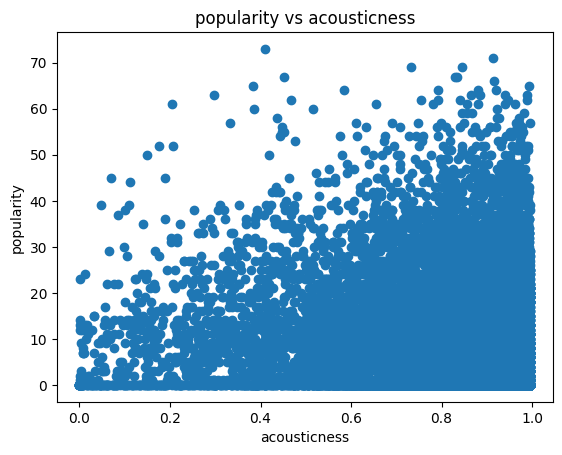

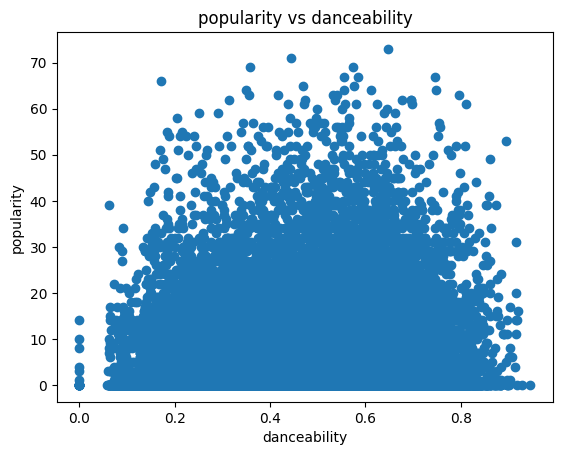

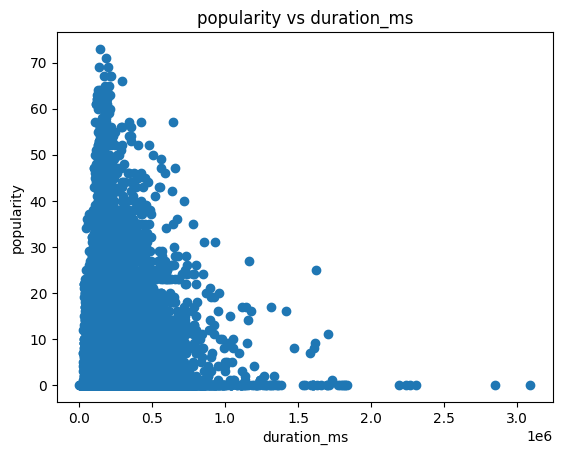

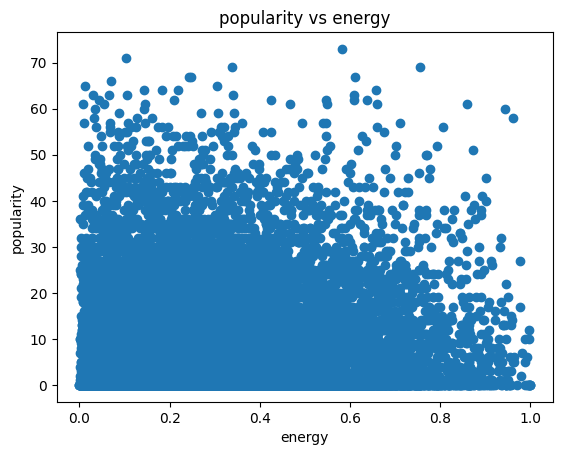

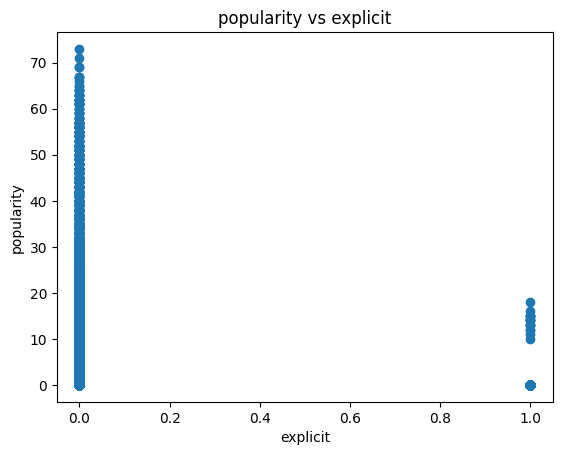

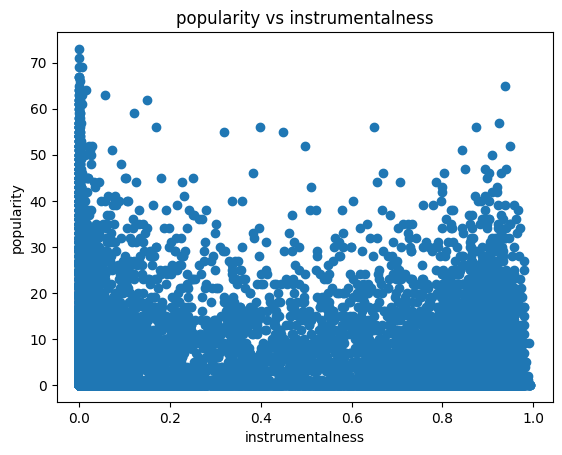

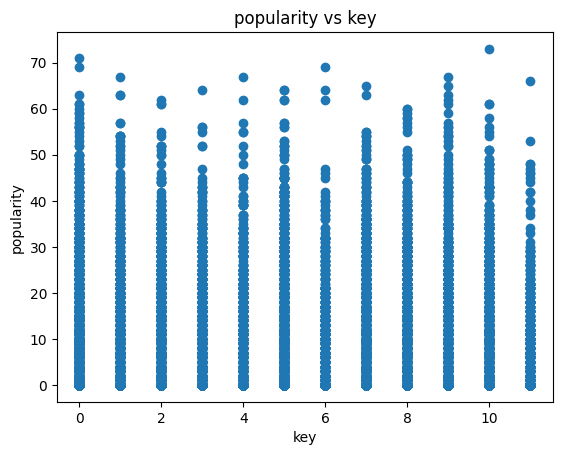

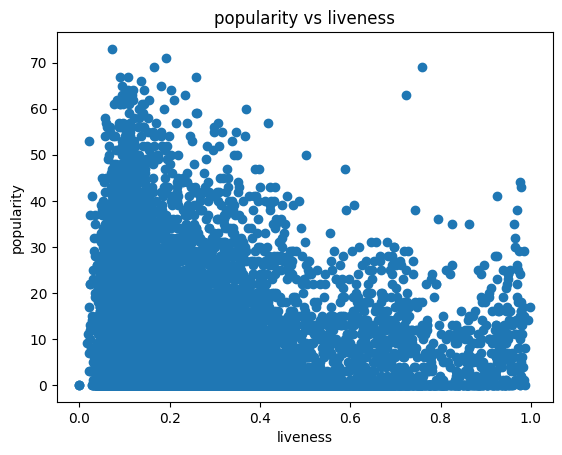

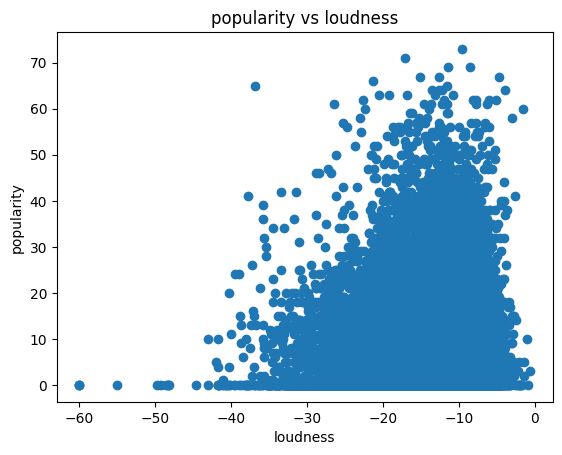

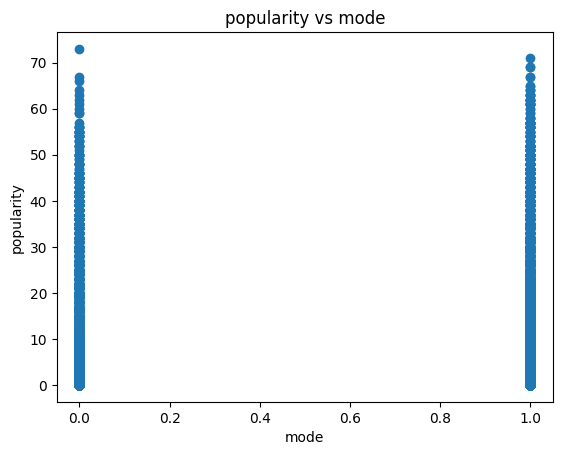

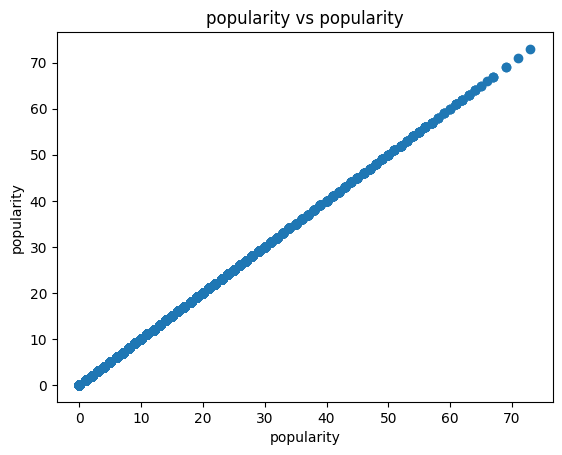

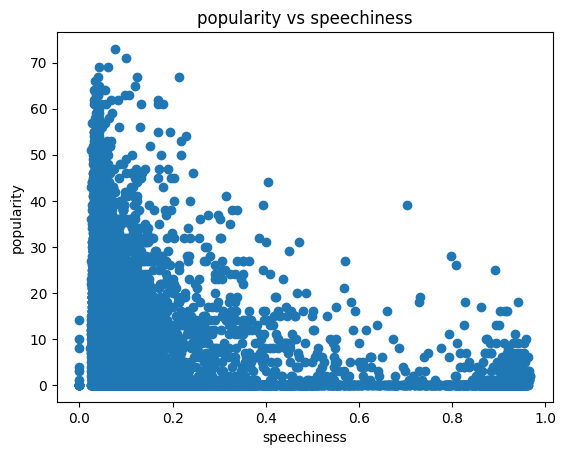

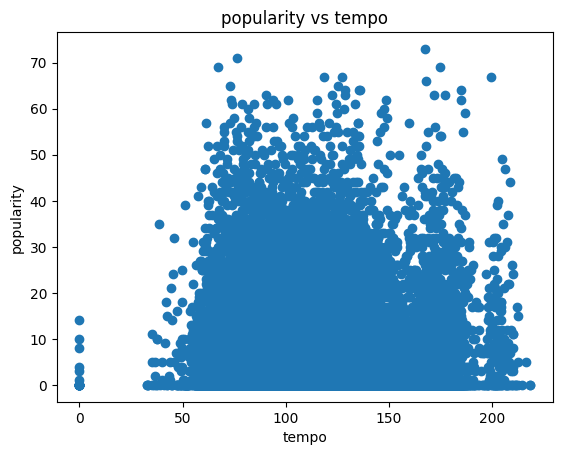

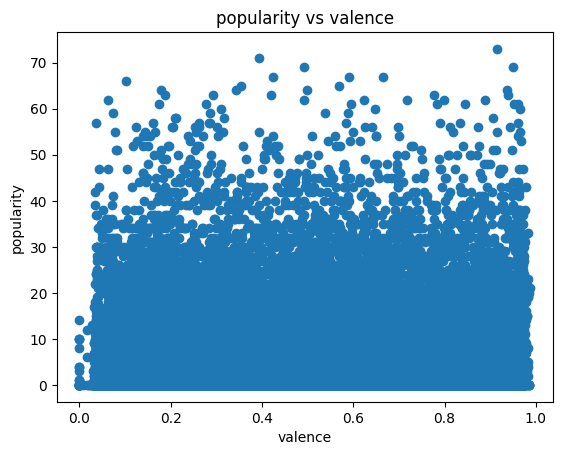

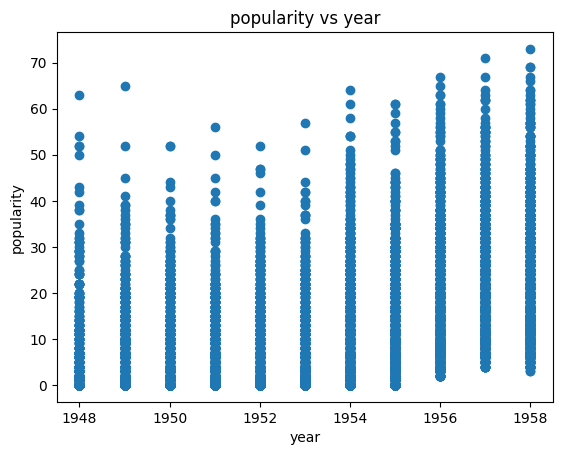

In [102]:
import matplotlib.pyplot as plt

nw_new_interval = new_interval.drop(['artists', 'id', 'name', 'release_date'], axis='columns')
cols = nw_new_interval.columns
for col in cols:
    plt.title(f"popularity vs {col}")
    plt.scatter(nw_new_interval[col], nw_new_interval['popularity'])
    plt.ylabel('popularity')
    plt.xlabel(f'{col}')
    plt.show()


# plt.scatter(new_interval['popularity'] 'acousticness'

We want to save the results gotten to a csv so the operation must not be repeated each time

In [6]:

corr_df = pd.DataFrame(list(popularity_corr.items()), columns=['interval', 'correlation matrix'])
corr_df.to_csv('popular_corr_matrix_10_yr_inter.csv', index=False)

Now, we use the csv created.

In [19]:
import pandas as pd
import numpy as np

popularity_corr_df = pd.read_csv('popular_corr_matrix_10_yr_inter.csv')


for i in range(len(corr_df)):
    # get ith row
    row = corr_df.iloc[i]
    row_interval = row['interval']
    row_corr_matrix = row['correlation matrix']

    # get the absolute values
    abs_vals = row_corr_matrix.abs()

    # unstack the correlation matrix, ie change it from the table like structi=ure to something more like a listing
    unstacked_corr = abs_vals.unstack()

    # sort values in decending order
    sort_values_desc = unstacked_corr.sort_values(ascending=False)

    pairs = set()
    i = 0
    result = pd.DataFrame()

    for index, value in sort_values_desc.iteritems():
        # (year(var1), popularity(var2)), 1
        #     ^         ^
        # index         value
        # if the absolute correlation score is greater than 0.5, if var1 !- var2, if index pair not already saved and if the duplicate is not saved
        if value >= 0.5 \
            and index[0] != index[1] \
            and (index[0], index[1]) not in pairs \
            and (index[1], index[0]) not in pairs:
                result.loc[i, ['variable 1', 'variable 2', 'correlation coefficient']] = [index[0], index[1], row_corr_matrix.loc[(index[0], index[1])]]
                pairs.add((index[0], index[1]))

        i += 1

    # features most correlated with popularity
    feat_cor_popu = result[(result['variable 1'] == 'popularity') | (result['variable 2'] == 'popularity')]
    
    # features most correlated with year
    feat_cor_yr = result[(result['variable 1'] == 'year') | (result['variable 2'] == 'year')]

    # yr_corr_list = list(feat_cor_yr.items())

    # get features correlated to both
    both_corr = (feat_cor_yr['variable 1'].isin(feat_cor_popu['variable 1']) | (feat_cor_yr['variable 2'].isin(feat_cor_popu['variable 1'])) | (feat_cor_yr['variable 1'].isin(feat_cor_popu['variable 2'])) | (feat_cor_yr['variable 2'].isin(feat_cor_popu['variable 2'])))
    feat_cor_yr = feat_cor_yr.assign(in_pop_cor=both_corr.astype(int))
    
    
    
    break
    


0      False
16     False
24     False
36     False
48     False
56      True
66     False
76     False
106    False
126    False
130     True
dtype: bool
    variable 1  variable 2  correlation coefficient
32    loudness  popularity                -0.996341
92         key  popularity                -0.927708
144   liveness  popularity                 0.581691            variable 1    variable 2  correlation coefficient  in_pop_cor
0                year          mode                 1.000000           0
16   instrumentalness          year                 0.999980           0
24               year        energy                 0.997879           0
36       danceability          year                 0.995453           0
48               year  acousticness                -0.988847           0
56               year      liveness                -0.980316           1
66        duration_ms          year                -0.976291           0
76               year   speechiness                 0

C:\Users\user\AppData\Local\Temp\ipykernel_10724\3809011274.py:26: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in sort_values_desc.iteritems():


The aim of this section is to try to estimate the genres based on the clusters formed

In [90]:
# ! pip install seaborn
# scikit-learn
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


modified_df = df[(X.between(1948, 1958))]
modified_df = modified_df.drop(['artists', 'id', 'name', 'release_date', 'year', 'popularity', 'duration_ms','mode'], axis='columns')
kmeans = KMeans(n_clusters=10)
kmeans.fit(modified_df)

# label = kmeans.fit_predict(df)

y_kmeans = kmeans.predict(modified_df)
centers = kmeans.cluster_centers_




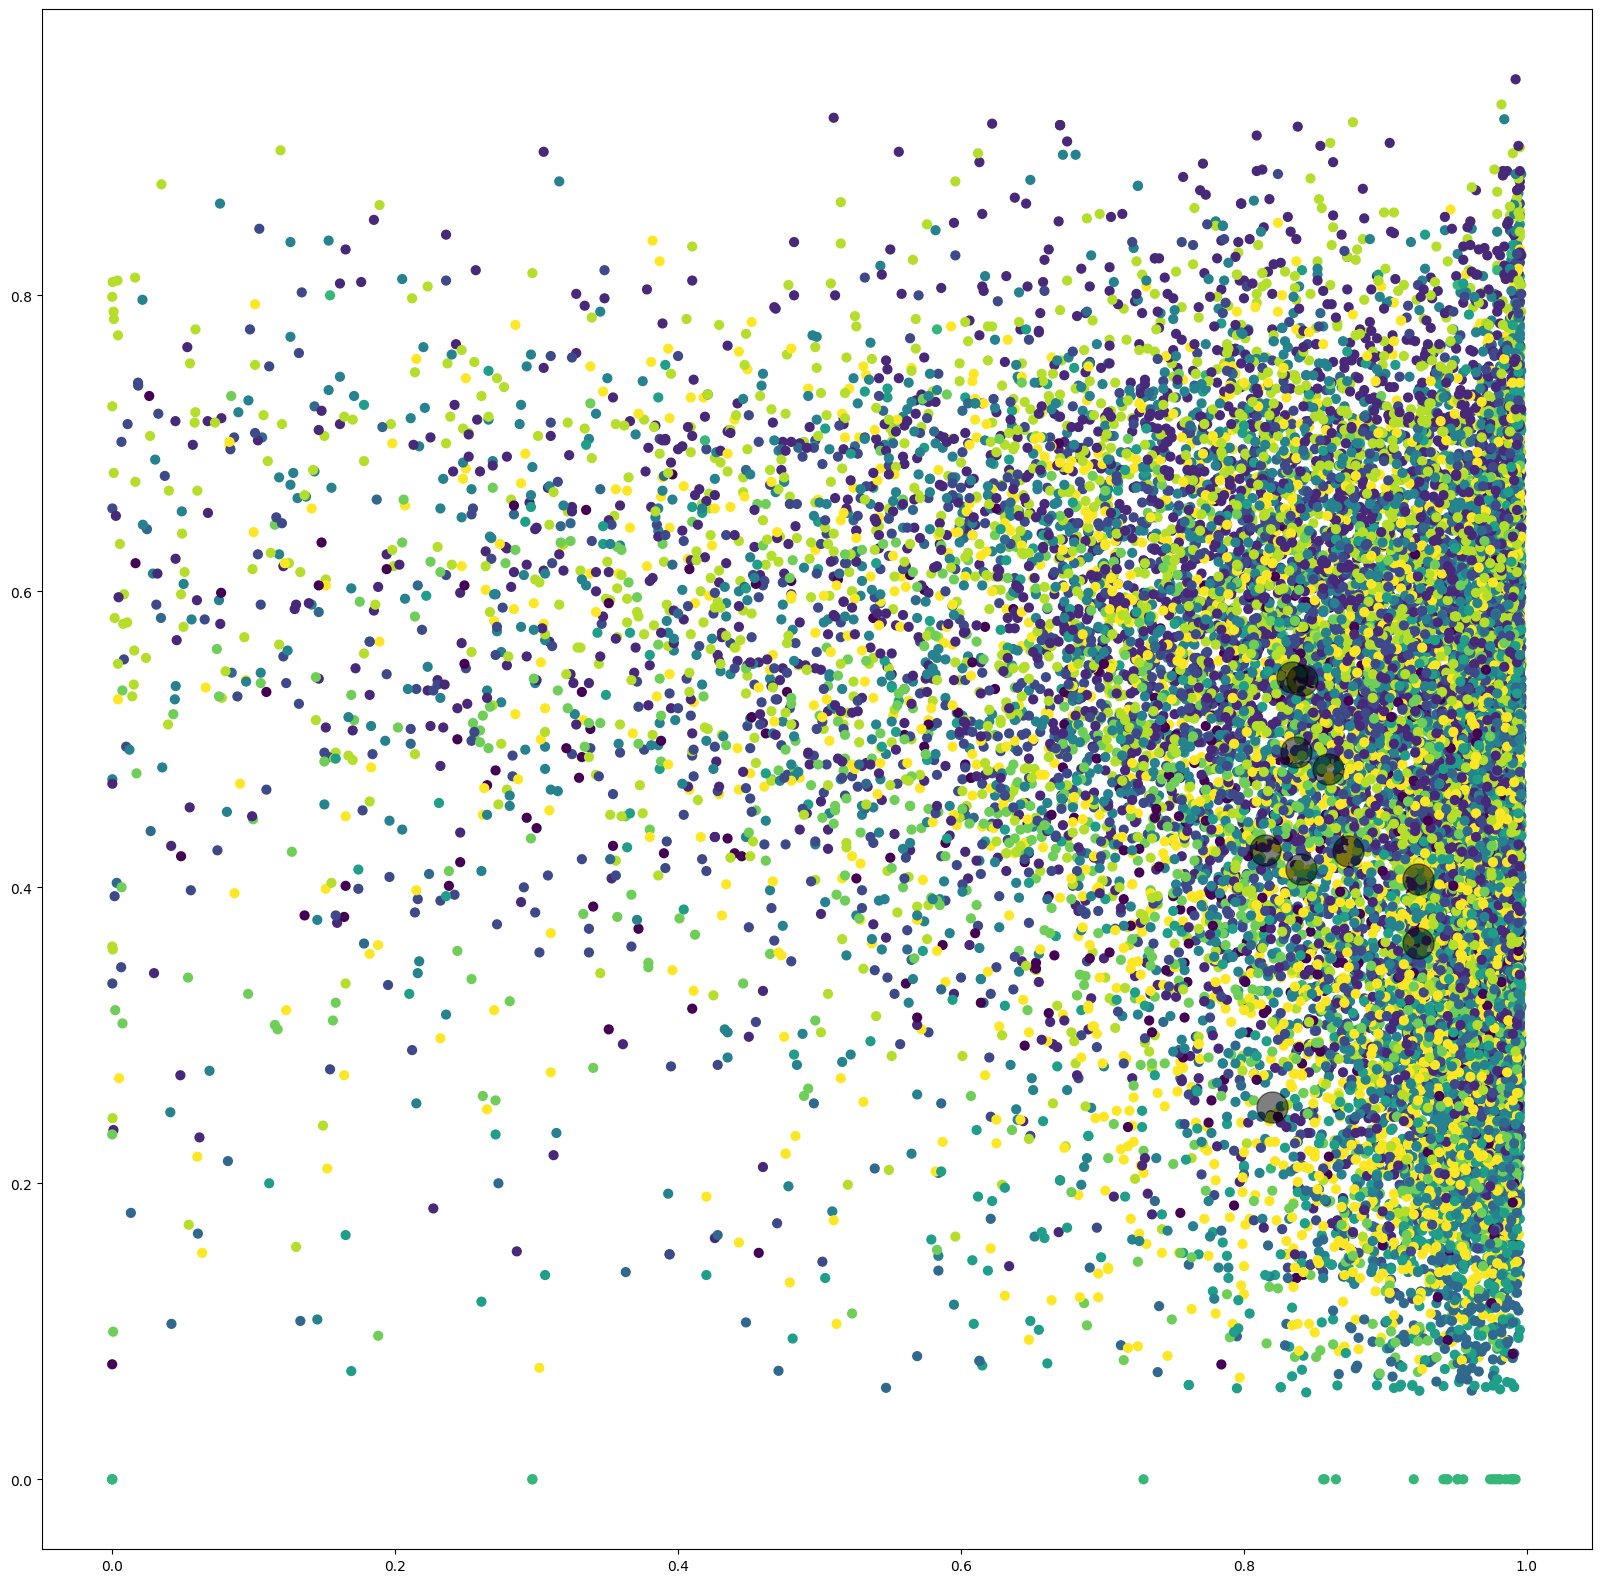

In [91]:
plt.figure(figsize=(20, 20))
plt.scatter(modified_df.iloc[:, 0], modified_df.iloc[:, 1], c=y_kmeans, s=40, cmap='viridis')


plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500, alpha=0.5)

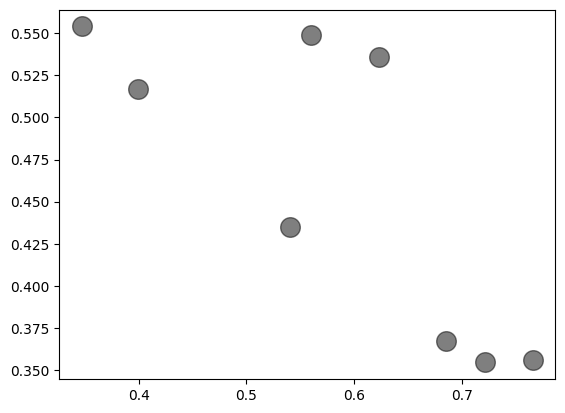

In [58]:
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [86]:
from sklearn.decomposition import KernelPCA

pca_df = df[(X.between(2008, 2018))]
pca_df = pca_df.drop(['artists', 'id', 'name', 'release_date', 'year', 'popularity', 'duration_ms'], axis='columns')
transformer = KernelPCA(n_components=2, kernel='rbf')

pca_df_transformed = transformer.fit_transform(pca_df)

C:\Users\user\AppData\Local\Temp\ipykernel_10724\1461573013.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='comp1', y='comp2',  palette=sns.color_palette("hls", 3),


[Text(0.5, 1.0, 'data KernelPCA projection')]

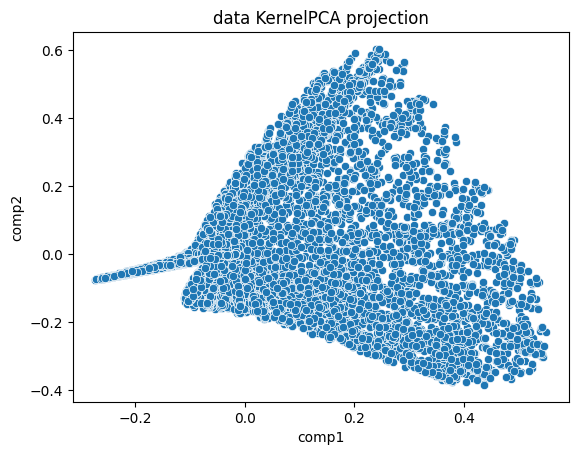

In [87]:
pca_df['comp1'] = pca_df_transformed[:, 0]
pca_df['comp2'] = pca_df_transformed[:, 1]

sns.scatterplot(x='comp1', y='comp2',  palette=sns.color_palette("hls", 3),
                data=pca_df).set(title="data KernelPCA projection")

C:\Users\user\AppData\Local\Temp\ipykernel_10724\292337700.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='comp1', y='comp2',  palette=sns.color_palette("hls", 3),


[Text(0.5, 1.0, 'data KernelPCA projection')]

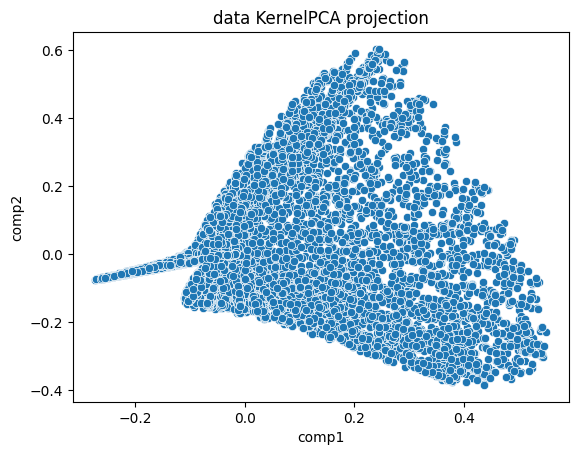

In [88]:
pca_df = df[(X.between(2008, 2018))]
pca_df = pca_df.drop(['artists', 'id', 'name', 'release_date', 'year', 'popularity', 'duration_ms'], axis='columns')
transformer = KernelPCA(n_components=3, kernel='rbf')

pca_df_transformed = transformer.fit_transform(pca_df)

pca_df['comp1'] = pca_df_transformed[:, 0]
pca_df['comp2'] = pca_df_transformed[:, 1]

sns.scatterplot(x='comp1', y='comp2',  palette=sns.color_palette("hls", 3),
                data=pca_df).set(title="data KernelPCA projection")

Here, we want to split the data into intervals of 10 years to see overtime, which feature was most correlated with popularity at which interval

In [34]:
df_f_5_years = df[(X.between(1978, 1998)) & (df['popularity'] < 50)]
print(len(df_f_5_years))
rq = df_f_5_years.corr()
rq
# rq['acousticness']
# for k, v in rq:
#     print(k, v)
# rq = rq[(rq.iloc[:, 0:19] != 1)]['popularity']
# rq.max()

34563


C:\Users\user\AppData\Local\Temp\ipykernel_10724\284346659.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  rq = df_f_5_years.corr()


,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
acousticness,1.000000,-0.158835,-0.061076,-0.703657,-0.138616,0.173073,-0.034322,-0.071318,-0.539293,0.070502,0.012677,-0.060648,-0.162601,-0.242247,0.013405
danceability,-0.158835,1.000000,-0.030312,0.052773,0.114607,-0.282277,0.031535,-0.160200,0.154060,-0.053693,0.045803,0.141355,-0.150175,0.591733,0.054863
duration_ms,-0.061076,-0.030312,1.000000,-0.002370,-0.004802,0.087281,0.003698,0.045040,-0.029102,-0.094144,0.028262,-0.033845,-0.058401,-0.150480,-0.017372
energy,-0.703657,0.052773,-0.002370,1.000000,0.119086,-0.159365,0.038674,0.195790,0.764605,-0.058368,-0.014569,0.127789,0.215026,0.306055,-0.019820
explicit,-0.138616,0.114607,-0.004802,0.119086,1.000000,-0.044318,0.024048,0.062113,0.111138,-0.053558,0.078367,0.397289,-0.034469,-0.022146,0.206709
instrumentalness,0.173073,-0.282277,0.087281,-0.159365,-0.044318,1.000000,-0.013164,-0.036336,-0.331291,-0.052424,-0.020505,-0.075547,-0.048872,-0.250682,-0.017897
key,-0.034322,0.031535,0.003698,0.038674,0.024048,-0.013164,1.000000,-0.007262,0.022650,-0.160669,-0.007366,0.040216,-0.005132,0.031136,0.006444
liveness,-0.071318,-0.160200,0.045040,0.195790,0.062113,-0.036336,-0.007262,1.000000,0.106864,0.016189,-0.065395,0.178087,0.029691,-0.079692,-0.035198
loudness,-0.539293,0.154060,-0.029102,0.764605,0.111138,-0.331291,0.022650,0.106864,1.000000,-0.011141,0.065116,0.055201,0.161743,0.277150,0.083649
mode,0.070502,-0.053693,-0.094144,-0.058368,-0.053558,-0.052424,-0.160669,0.016189,-0.011141,1.000000,-0.021477,-0.062269,0.017529,-0.000352,0.002594


In [ ]:
for index, value in s.sort_values(ascending=False).iteritems():
    print(index, value)

In [33]:
pairs = set()

i = 0

result = pd.DataFrame()

print("|    Variable 1    |    Variable 2    | Correlation Coefficient    |")
print("|------------------|------------------|----------------------------|")

for index, value in s.sort_values(ascending=False).iteritems():
    if value >= 0.5 and index[0] != index[1] and (index[0], index[1]) not in pairs and (index[1], index[0]) not in pairs:
        print(f'|    {index[0]}    |    {index[1]}    |    {rq.loc[(index[0], index[1])]}    |')
        result.loc[i, ['Variable 1', 'Variable 2', 'Correlation Coefficient']] = [index[0], index[1], rq.loc[(index[0], index[1])]]
        pairs.add((index[0], index[1]))

        i += 1


|    Variable 1    |    Variable 2    | Correlation Coefficient    |
|------------------|------------------|----------------------------|
|    year    |    mode    |    1.0000000000000142    |
|    instrumentalness    |    year    |    0.9999798116611293    |
|    mode    |    instrumentalness    |    0.9999798116611152    |
|    speechiness    |    duration_ms    |    -0.9987812465198703    |
|    acousticness    |    danceability    |    -0.998537676273812    |
|    year    |    energy    |    0.9978793037385202    |
|    energy    |    mode    |    0.997879303738506    |
|    acousticness    |    duration_ms    |    0.9976411815743371    |
|    energy    |    instrumentalness    |    0.9974455520908899    |
|    loudness    |    popularity    |    -0.996340880260685    |
|    instrumentalness    |    danceability    |    0.9960377892792965    |
|    danceability    |    year    |    0.9954525926991463    |
|    mode    |    danceability    |    0.9954525926991322    |
|    acousticn

C:\Users\user\AppData\Local\Temp\ipykernel_14904\3943408550.py:10: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, value in s.sort_values(ascending=False).iteritems():


In [5]:
df.corr()['popularity']

C:\Users\user\AppData\Local\Temp\ipykernel_14904\244986905.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['popularity']


acousticness       -0.593345
danceability        0.221077
duration_ms         0.063292
energy              0.497488
explicit            0.214044
instrumentalness   -0.299829
key                 0.010675
liveness           -0.075293
loudness            0.466546
mode               -0.032854
popularity          1.000000
speechiness        -0.135707
tempo               0.135047
valence             0.009327
year                0.880724
Name: popularity, dtype: float64